<a href="https://colab.research.google.com/github/Saradha-4144/Major-Project/blob/main/Major_project_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import dataset

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/Idmb_review/Train.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_df.head(10)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
5,A terrible movie as everyone has said. What ma...,0
6,Finally watched this shocking movie last night...,1
7,I caught this film on AZN on cable. It sounded...,0
8,It may be the remake of 1987 Autumn's Tale aft...,1
9,My Super Ex Girlfriend turned out to be a plea...,1


In [6]:
train_df['text'][0]

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

In [7]:
train_df['text'][39999]

'Why would this film be so good, but only gross an estimated $95,000,000 and have NO award nominations? John Travolta knows what he\'s doing. He knows he\'s Michael, a cigar smoking, womanizing, magical arch angel that came down to live with a dying lady and is now in a car with the staff of "The National Mirror" and their dog, Sparky, on the way to Chicago. It then turns into a road trip that\'s both horrible AND great. I don\'t even think the death scenes (3 to be exact) make this a tearjerker. The soundtrack is the best with "Heaven Is My Home", "Up Around The Bend", and "Chains Of Fools". I have very great expectations about this and I say that it should have had a little more respect in the 90\'s. Read my comment. Bye!'

shape of train data

In [8]:
train_df.shape

(40000, 2)

In [9]:
train_df.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Number of reviews is 40k, so its either positive (1) or negative(0), nothing in between. 

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


from info: All the data are non null.So cool

Visualize data

In [11]:
train_df['length'] = train_df['text'].apply(len)  #adding another column which contains length of review

In [12]:
train_df

,text,label,length
0,I grew up (b. 1965) watching and loving the Th...,0,874
1,"When I put this movie in my DVD player, and sa...",0,1811
2,Why do people who do not know what a particula...,0,983
3,Even though I have great interest in Biblical ...,0,351
4,Im a die hard Dads Army fan and nothing will e...,1,983
...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,3111
39996,This movie is an incredible piece of work. It ...,1,291
39997,My wife and I watched this movie because we pl...,0,1092
39998,"When I first watched Flatliners, I was amazed....",1,1045


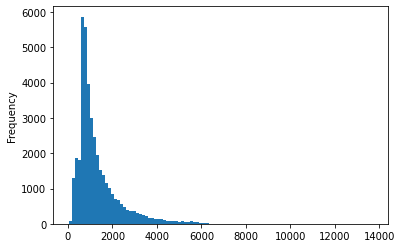

In [13]:
train_df['length'].plot(bins=100, kind='hist')  #plot b/w number of words vs number of people

In [14]:
train_df[train_df['length']==13704]['text'].iloc[0] #the biggest review

'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, bu

Counting categories

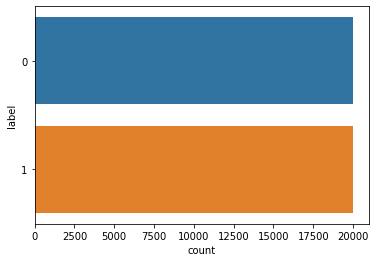

In [15]:
sns.countplot(y = 'label', data = train_df)

Data is balanced. So, cool

Ok, now for negative review what's the length of the data and similarly for positive review. Like only for neg plot the length and only for pos plot the length

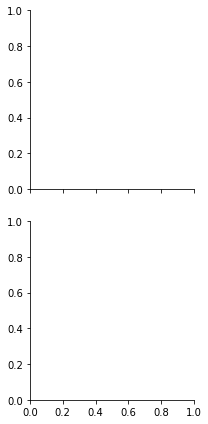

In [16]:
g = sns.FacetGrid(data = train_df,col='label',col_wrap=1)

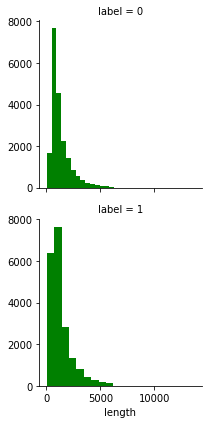

In [17]:
g = sns.FacetGrid(data = train_df,col='label',col_wrap=1)
#plotting histogram
g.map(plt.hist,'length',bins=20,color='g')

In [18]:
#viewing negative review
train_df_0 = train_df[train_df['label']==0]
train_df_0

,text,label,length
0,I grew up (b. 1965) watching and loving the Th...,0,874
1,"When I put this movie in my DVD player, and sa...",0,1811
2,Why do people who do not know what a particula...,0,983
3,Even though I have great interest in Biblical ...,0,351
5,A terrible movie as everyone has said. What ma...,0,596
...,...,...,...
39984,I couldn't relate to this film. It failed to e...,0,729
39985,Comedy? What's so funny about watching an ugly...,0,781
39993,"""The Best Movie of the 90's"" ""The Welsh Trains...",0,2726
39994,My girlfriend has the habit of going to Blockb...,0,2738


In [19]:
train_df_1 = train_df[train_df['label']==1]
train_df_1

,text,label,length
4,Im a die hard Dads Army fan and nothing will e...,1,983
6,Finally watched this shocking movie last night...,1,1377
8,It may be the remake of 1987 Autumn's Tale aft...,1,1137
9,My Super Ex Girlfriend turned out to be a plea...,1,1468
10,I can't believe people are looking for a plot ...,1,666
...,...,...,...
39992,Although I agree that it's a good but not grea...,1,873
39995,"""Western Union"" is something of a forgotten cl...",1,3111
39996,This movie is an incredible piece of work. It ...,1,291
39998,"When I first watched Flatliners, I was amazed....",1,1045


In [20]:
train_df_10 = pd.concat([train_df_0,train_df_1])
train_df_10

,text,label,length
0,I grew up (b. 1965) watching and loving the Th...,0,874
1,"When I put this movie in my DVD player, and sa...",0,1811
2,Why do people who do not know what a particula...,0,983
3,Even though I have great interest in Biblical ...,0,351
5,A terrible movie as everyone has said. What ma...,0,596
...,...,...,...
39992,Although I agree that it's a good but not grea...,1,873
39995,"""Western Union"" is something of a forgotten cl...",1,3111
39996,This movie is an incredible piece of work. It ...,1,291
39998,"When I first watched Flatliners, I was amazed....",1,1045


In [21]:
print(len(train_df_1))
print(len(train_df_10))

19981
40000


data cleaning

In [27]:
import re
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removes @mentions
  text = re.sub(r'#', '',text) #removing the # symbol
  text = re.sub(r'RT[\s]+','',text) #removing RT
  text = re.sub('https?:\/\/\S+','',text) #removing hyperlink
  text = re.sub(r'[^\w\s]','', text) #removing punctuations
  text = re.sub(r'[0-9]', '', text) #removing numbers

  return text

#clean the tweets
train_df['text'] = train_df['text'].apply(cleanTxt)

#show the cleaned tweets
train_df

,text,label,length
0,I grew up b watching and loving the Thunderbi...,0,874
1,When I put this movie in my DVD player and sat...,0,1811
2,Why do people who do not know what a particula...,0,983
3,Even though I have great interest in Biblical ...,0,351
4,Im a die hard Dads Army fan and nothing will e...,1,983
...,...,...,...
39995,Western Union is something of a forgotten clas...,1,3111
39996,This movie is an incredible piece of work It e...,1,291
39997,My wife and I watched this movie because we pl...,0,1092
39998,When I first watched Flatliners I was amazed I...,1,1045


In [34]:
# assigning features and o/p

x=train_df.iloc[:,0]
y=train_df.iloc[:,1]

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0, stratify = y)

In [36]:
print(x_train.shape)
print(x_test.shape)

(28000,)
(12000,)


In [37]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([14013, 13987]))

In [38]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([6006, 5994]))

Vectorization and model creation

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

#since its a binary classification(positive or negative) logistic reg is used
text_model = Pipeline([('Tfidf',TfidfVectorizer()),('model',LogisticRegression())])

In [42]:
text_model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('Tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scali

In [43]:
y_pred = text_model.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [44]:
positive = train_df[train_df['label']==1]
positive.iloc[3].values

array(['My Super Ex Girlfriend turned out to be a pleasant surprise for me I was really expecting a horrible movie that would probably be stupid and predictable and you know what It was But this movie did have so many wonderful laughs and a fun plot that anyone could get a kick out of I know that this was a very cheesy movie but Uma and Anna were just so cool and Steve was such a great addition along with a great cast that looked like they had so much fun and thats what made the movie really workbr br Jenny Johnsonscary thats my best friends actual name is not your typical average librarian looking woman when Matt your average male asks her out hes in for more than he expected hes asked GGirl out on a date the super hero of the world But when he finds out what a jealous and crazy girl she really is and decides that it may be a good idea that they spend some time apart but Jenny wont have it since hes fallen for another girl Hannah and she will make his life a living hell I mean lets fa

Model Evaluation

In [45]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [48]:
accuracy_score(y_pred,y_test)*100

89.06666666666668

In [53]:
confusion_matrix(y_pred,y_test)

array([[5284,  590],
       [ 722, 5404]])

In [55]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5874
           1       0.90      0.88      0.89      6126

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



Creation of web app

In [56]:
# saving model - joblib

import joblib 
joblib.dump(text_model,'review_sentiment_analysis')

['review_sentiment_analysis']

In [57]:
!pip install -q --upgrade ipython
!pip install -q --upgrade ipykernel

     |████████████████████████████████| 788kB 4.3MB/s 
     |████████████████████████████████| 368kB 9.0MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.22.0 which is incompatible.
     |████████████████████████████████| 122kB 5.7MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.22.0 which is incompatible.


In [59]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

In [60]:
%%writefile app.py
import joblib 
import streamlit as st
model=joblib.load('review_sentiment_analysis')
st.title('Review Analysis')
ip= st.text_input('Enter your review: ')
op = model.predict([ip])
if st.button('Analyse'):
  st.title(op[0])

Writing app.py


In [61]:
!nohup streamlit run app.py &
url=ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://bc292c2c43d2.ngrok.io'

Deployment on Heroku